# Win-Go, Color_Prediction Dataset
This is a Dataset Scraped from the site Anga Clubs , Win-Go contest.

About Dataset-
This is a Win and Go type contest where one have to predict the color which upon predicting correctly will double or tripple the money. There is some data generated along with the color where we can make use of it to predict the color.
So I was curious to apply any Machine Learning or Deep Learning Models upon it to just look whether the models can catch the pattern or not. But model does pretty good on this Dataset.I used RandomForestClassifier to solve this problem.

In [1]:
#Import required libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data--
df = pd.read_csv("Win-Go.csv.csv")

#display top 10 data
display(df.head(10))

#some info about data
print("Information of data",df.info())
print('Missing values of data',df.isnull().sum())
print('Statistics of data',df.describe())
print('Columns of data',df.columns)
print('Shape of data',df.shape)

,Period,Price,Number,Color
0,20200729238,86354,4,Red
1,20200729237,86366,6,Red
2,20200729236,86362,2,Red
3,20200729235,86361,1,Green
4,20200729234,86365,5,Green-Violet
5,20200729233,86379,9,Green
6,20200729232,86395,5,Green-Violet
7,20200729231,86402,2,Red
8,20200729230,86401,1,Green
9,20200729229,86415,5,Green-Violet


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Period  9999 non-null   int64 
 1   Price   9999 non-null   int64 
 2   Number  9999 non-null   int64 
 3   Color   9999 non-null   object
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
Information of data None
Missing values of data Period    0
Price     0
Number    0
Color     0
dtype: int64
Statistics of data              Period          Price       Number
count  9.999000e+03    9999.000000  9999.000000
mean   2.020072e+10  145184.157216     4.462246
std    6.018693e+03   34152.241634     2.867646
min    2.020071e+10   86354.000000     0.000000
25%    2.020071e+10  115465.500000     2.000000
50%    2.020072e+10  145521.000000     4.000000
75%    2.020072e+10  174713.500000     7.000000
max    2.020073e+10  204107.000000     9.000000
Columns of data Index(['Period', 'Price', 'Number', 'Color'], dtyp

In [3]:
#Observation-- data contain three features only and don't have missing values on any variable

<Figure size 1600x1200 with 0 Axes>

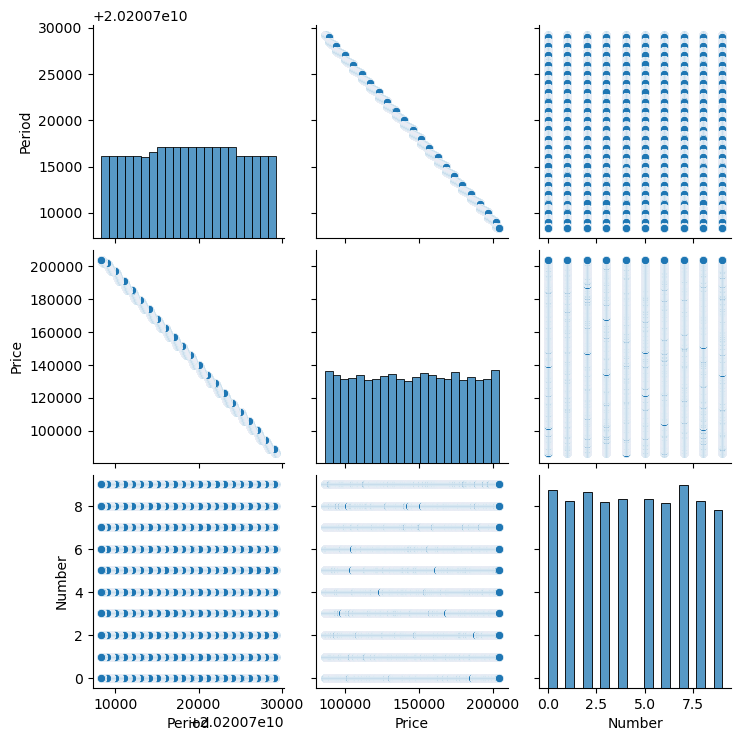

In [4]:
#Visualization of all variables
plt.figure(figsize=(16,12))
sns.pairplot(df)
#plt.title("PairPlot of Data")

<AxesSubplot:>

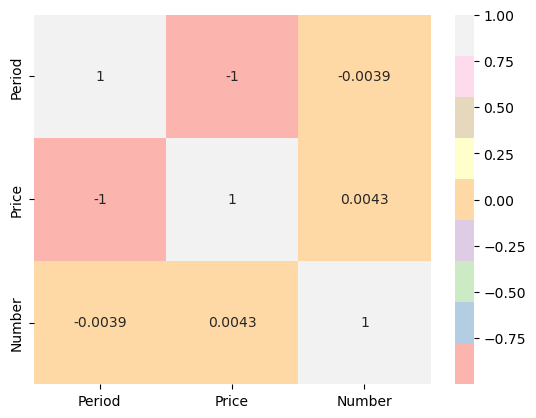

In [5]:
#Correlation of all variables
corr_metrics = df.corr()
#correlation =corr_metrics["Color"].sort_values(ascending=False)
sns.heatmap(corr_metrics,annot=True,cbar="cbar",cmap="Pastel1")

In [6]:
#Let's separate the features and labels
x = df.drop(columns={'Color'},axis=1)
y = df['Color']
print('Features are separted from data')
print('Labels are separted from data')

#split the data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state =42)
print("Shape of x_train data:",x_train.shape)
print("Shape of x_test data:",x_test.shape)
print("Shape of y_train data:",y_train.shape)
print("Shape of y_test data:",y_test.shape)

Features are separted from data
Labels are separted from data
Shape of x_train data: (7999, 3)
Shape of x_test data: (2000, 3)
Shape of y_train data: (7999,)
Shape of y_test data: (2000,)


In [7]:
#Build Pipline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

#create pipeline
my_pipeline =Pipeline([
    #("Polyfeatures",PolynomialFeatures(degree=2)),
    ("scaler",StandardScaler()),
    ("RF_clf",RandomForestClassifier())
])
print('pipeline creation done!')

#feed training data to model
my_pipeline.fit(x_train,y_train)
print("Training data feed to the model.")

#params for RandomForeClassifier
param_grid = {
    'RF_clf__n_estimators':[10,20,30,50,100,200,300],
    'RF_clf__max_depth':[2,4,6,8,10,12,14],
    'RF_clf__max_features':['auto','sqrt','log2']
}

#add params to gridsearchcv
RF_grd = GridSearchCV(my_pipeline, param_grid, cv=5)

#feed trainig data to grid search cv
RF_grd.fit(x_train,y_train)
print('trainig data feed to GridSearchCV')

#print best estimators--
print("Best estimators:",RF_grd.best_estimator_)
#print best params
print("Best params:",RF_grd.best_params_)

#add best params to the model pipeline
model_pipeline=RF_grd.best_estimator_
print("Best estimator and best params fit to the model pipeline!")
#All best parameter added to the model
#now lets predict on test data and check error
y_test_prediction=model_pipeline.predict(x_test)
print("Prediction done on x_test data.")

#make dataframe of actual and predicted value
Final_result = pd.DataFrame({"Actual":y_test,"Prediction":y_test_prediction})
display(Final_result.head(10))

pipeline creation done!
Training data feed to the model.
trainig data feed to GridSearchCV
Best estimators: Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_clf',
                 RandomForestClassifier(max_depth=14, n_estimators=30))])
Best params: {'RF_clf__max_depth': 14, 'RF_clf__max_features': 'auto', 'RF_clf__n_estimators': 30}
Best estimator and best params fit to the model pipeline!
Prediction done on x_test data.


,Actual,Prediction
5344,Red,Red
7444,Red,Red
1731,Green,Green
8719,Green,Green
4521,Green,Green
7453,Red,Red
576,Red,Red
7428,Red,Red
5577,Red,Red
439,Green,Green


In [8]:
#Plotting test values and predicted test values--
#Final_result.plot(kind='line',figsize=(18,8))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Error Calculation

In [9]:
#import mse
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#mse = mean_squared_error(y_test,y_test_prediction)
#print("Mean squareed error:",mse)
#mae = mean_absolute_error(y_test,y_test_prediction)
#print("Mean absolute error:",mae)
accuracy = accuracy_score(y_test,y_test_prediction)*100
print("Accuracy of the model:",accuracy)

Accuracy of the model: 92.65


# Model Export Using Pickle

In [10]:
import pickle
pickle.dump(my_pipeline,open("color_prediction.pkl","wb"))
color_prediction_load=pickle.load(open("color_prediction.pkl","rb"))

In [ ]:
#CONCLUSION : accuracy of this model is 92.65% after using RandomForestClassifier,
#when i added PolynomialFeatures in the pipeline training data got overfitted 
#beacuse of it fits too closely to the training dataset.The model captured 
#noise in the data and not just the underlying trends
#so, i removed PolynomalFeatures from the pipline to avoid overfitting problem.